In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [118]:
data = 'train.csv'
df = pd.read_csv(data)
df.head

<bound method NDFrame.head of        Unnamed: 0                                             review  label
0               0  I think they really let the quality of the DVD...      0
1               1  I'm sorry but this is just awful. I have told ...      0
2               2  The Japenese sense of pacing, editing and musi...      0
3               3  In the '60's/'70's, David Jason was renowned f...      1
4               4  "Hail The Woman" is one of the most moving fil...      1
...           ...                                                ...    ...
39995       39995  When you come across a gem of a movie like thi...      1
39996       39996  I don't often go out of my way to write commen...      0
39997       39997  This is an extremely silly and little seen fil...      0
39998       39998  Just saw the movie, and the scary thing was, t...      1
39999       39999  ...though for a film that seems to be trying t...      0

[40000 rows x 3 columns]>

In [4]:
df['review'][0]

"I think they really let the quality of the DVD production get away from them. I rented this DVD from 2 movie stores and the second time I finally got it to play on the 3rd DVD player I tried.<br /><br />Anyone else have this issue? It's really hard to give the film an un-biased review after going through such a hassle to play it. For one, I've never seen a Finnish horror film before so I was sort of bummed that the movie was done in English. Also since it's never made clear what is wrong with Sarah, she just came off as retarded and therefore I really just hoped someone would shoot her in the face and make all the horrific happenings go away."

In [4]:
df['review'][0].replace('<br />', ' ')

"I think they really let the quality of the DVD production get away from them. I rented this DVD from 2 movie stores and the second time I finally got it to play on the 3rd DVD player I tried.  Anyone else have this issue? It's really hard to give the film an un-biased review after going through such a hassle to play it. For one, I've never seen a Finnish horror film before so I was sort of bummed that the movie was done in English. Also since it's never made clear what is wrong with Sarah, she just came off as retarded and therefore I really just hoped someone would shoot her in the face and make all the horrific happenings go away."

In [119]:
preprocess_df(df)

,Unnamed: 0,review,label,excl_number,q_number,neg_number,pos_number,comm_number,double_excl_number
0,0,I think they really let the quality of the DVD...,0,0.000000,0.003371,0.0,0.0,0.003252,0.000000
1,1,I'm sorry but this is just awful. I have told ...,0,0.000000,0.003480,0.0,0.0,0.001678,0.000000
2,2,"The Japenese sense of pacing, editing and musi...",0,0.000000,0.000000,0.0,0.0,0.010511,0.000000
3,3,"In the '60's/'70's, David Jason was renowned f...",1,0.002572,0.000000,0.0,0.0,0.011702,0.000000
4,4,"""Hail The Woman"" is one of the most moving fil...",1,0.000000,0.000000,0.0,0.0,0.010711,0.000000
...,...,...,...,...,...,...,...,...,...
39995,39995,When you come across a gem of a movie like thi...,1,0.002259,0.000000,0.0,0.0,0.011423,0.000000
39996,39996,I don't often go out of my way to write commen...,0,0.001977,0.000000,0.0,0.0,0.005998,0.000000
39997,39997,This is an extremely silly and little seen fil...,0,0.003639,0.000000,0.0,0.0,0.000000,0.000000
39998,39998,"Just saw the movie, and the scary thing was, t...",1,0.009800,0.000000,0.0,0.0,0.009911,0.005896


In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 4))
words = vectorizer.fit_transform(df['review'])
words.shape

(40000, 10643083)

In [67]:
def preprocess_df(df):
    df['review'] = df['review'].apply(lambda s: s.replace('<br />', ' '))
    df['excl_number'] = tfidf_symb(df['review'], '!')
    df['q_number'] = tfidf_symb(df['review'], '?')
    #df['dot_number'] = tfidf_symb(df['review'], '.')
    df['neg_number'] = tfidf_neg(df['review'])
    df['pos_number'] = tfidf_pos(df['review'])
    df['comm_number'] = tfidf_symb(df['review'], ',')
    df['double_excl_number'] = tfidf_symb(df['review'], '!!')
    
    return df

In [22]:
df['excl_number']

0        0.000000
1        0.000000
2        0.000000
3        0.002572
4        0.000000
           ...   
39995    0.002259
39996    0.001977
39997    0.003639
39998    0.009800
39999    0.004088
Name: excl_number, Length: 40000, dtype: float64

<BarContainer object of 40000 artists>

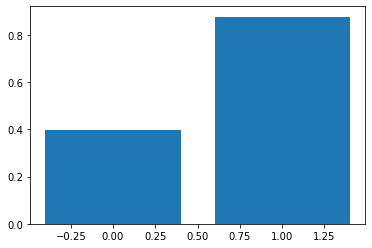

In [143]:
import matplotlib.pyplot as plt
plt.bar(df['label'], df['excl_number'])

In [55]:
 df['double_excl_number'] = tfidf_symb(df['review'], '!!')

<BarContainer object of 40000 artists>

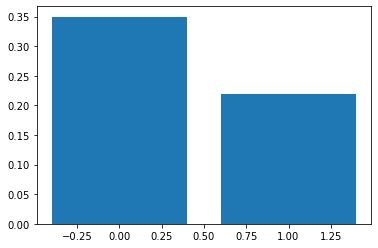

In [57]:
import matplotlib.pyplot as plt
plt.bar(df['label'], df['double_excl_number'])

In [151]:
df['q_number'] = tfidf_symb(df['review'], '?')

<BarContainer object of 40000 artists>

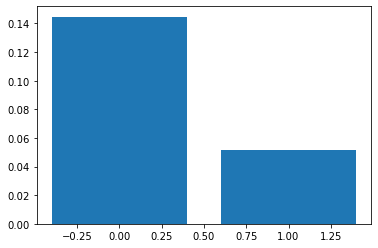

In [152]:
plt.bar(df['label'], df['q_number'])

In [153]:
df['dot_number'] = tfidf_symb(df['review'], '.')

<BarContainer object of 40000 artists>

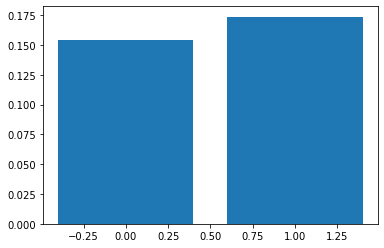

In [36]:
plt.bar(df['label'], df['dot_number'])

In [15]:
import math
def get_neg(s):
    a = s.count('('); b = s.count(')')
    if a - b <= 0: return 0
    else: return (a - b) / len(s)
def get_pos(s):
    a = s.count('('); b = s.count(')')
    if b - a <= 0: return 0
    else: return (b - a) / len(s)

In [154]:
df['neg_number'] = tfidf_neg(df['review'])
df['pos_number'] = tfidf_pos(df['review'])

<BarContainer object of 40000 artists>

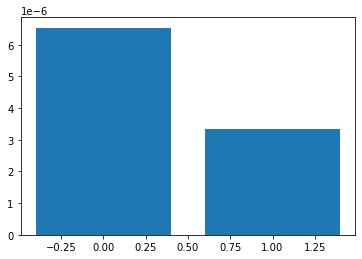

In [38]:
plt.bar(df['label'], df['neg_number'])

<BarContainer object of 40000 artists>

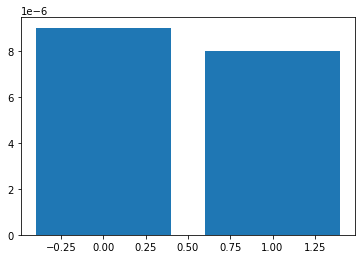

In [39]:
plt.bar(df['label'], df['pos_number'])

In [48]:
df['comm_number'] = tfidf_symb(df['review'], ',')

<BarContainer object of 40000 artists>

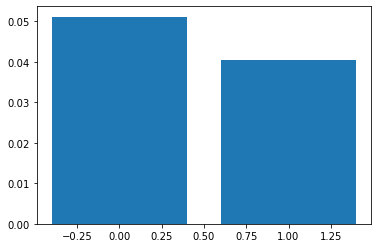

In [156]:
plt.bar(df['label'], df['comm_number'])

In [ ]:
df['big_number'] = tfidf_big(df['review'])

In [9]:
def tfidf_symb(texts, sym):
    idf = np.log((len(texts) + 1) / (np.sum(texts.apply(lambda s: 0 if s.find(sym) == -1 else 1)) + 1)) + 1
    res = []
    for text in texts:
        tf = text.count(sym) / len(text)
        res.append(tf * idf)
    return res
def tfidf_neg(texts):
    idf = np.log((len(texts) + 1) / (np.sum(texts.apply(lambda s: 0 if get_neg(s) == 0 else 1)) + 1)) + 1
    res = []
    for text in texts:
        tf = get_neg(text) / len(text)
        res.append(tf * idf)
    return res
def tfidf_pos(texts):
    idf = np.log((len(texts) + 1) / (np.sum(texts.apply(lambda s: 0 if get_pos(s) == 0 else 1)) + 1)) + 1
    res = []
    for text in texts:
        tf = get_pos(text) / len(text)
        res.append(tf * idf)
    return res

import re
def count_upper(s):
    return len(re.findall(r'[A-Z]',s))


def tfidf_big(texts):
    res = []
    for text in texts:
        n = count_upper(text)
        tf = n / len(text)
        idf = np.log((len(texts) + 1) / (np.sum(texts.apply(lambda s: 0 if count_upper(s) >= n else 1)) + 1)) + 1
        res.append(tf * idf)
    return res

In [27]:
from scipy.sparse import *
words = hstack([words, coo_matrix(df['excl_number']).T])

In [32]:
words = hstack([words, coo_matrix(df['q_number']).T])

In [58]:
words = hstack([words, coo_matrix(df['double_excl_number']).T])

In [37]:
words = hstack([words, coo_matrix(df['neg_number']).T])

In [42]:
words = hstack([words, coo_matrix(df['pos_number']).T])

In [50]:
words = hstack([words, coo_matrix(df['comm_number']).T])

In [104]:
def preprocess_words(words, df):
    words = hstack([words, coo_matrix(df['excl_number']).T])
    words = hstack([words, coo_matrix(df['double_excl_number']).T])
    words = hstack([words, coo_matrix(df['q_number']).T])
    words = hstack([words, coo_matrix(df['neg_number']).T])
    words = hstack([words, coo_matrix(df['pos_number']).T])
    words = hstack([words, coo_matrix(df['comm_number']).T])
    return words

In [50]:
coo_matrix(df['excl_number']).T.shape

(40000, 1)

In [154]:
words = preprocess_words(words, df)

In [155]:
X = words
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [156]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)
#logreg.fit(X_train, y_train)

In [157]:
y_pred_test = model.predict(X_test)
print('Model f1 score: {0:0.6f}'. format(f1_score(y_test, y_pred_test)))#0.879980

Model f1 score: 0.881369


In [158]:
y_pred_train = model.predict(X_train)
print('Model f1 score: {0:0.6f}'. format(f1_score(y_train, y_pred_train)))#0.985486

Model f1 score: 0.999215


In [159]:
datat = 'test.csv'
dft = pd.read_csv(datat)
dft.head

<bound method NDFrame.head of       Unnamed: 0                                             review
0              0  The make -or-break of a love story for me is w...
1              1  "Bend It Like Beckham" is a film that got very...
2              2  Pete's Meteor. I seen this referred to as "aut...
3              3  Funny that I find myself forced to review this...
4              4  Bare Wench is another softcore parody of the B...
...          ...                                                ...
9995        9995  The only reason I wanted to see this was becau...
9996        9996  Three Russian aristocrats soak up the decadenc...
9997        9997  Greetings again from the darkness. Remember al...
9998        9998  This film is a tour de force from Julie Taymor...
9999        9999  I'll be honest,I finally checked this movie no...

[10000 rows x 2 columns]>

In [160]:
preprocess_df(dft)

,Unnamed: 0,review,excl_number,q_number,neg_number,pos_number,comm_number,double_excl_number
0,0,The make -or-break of a love story for me is w...,0.001547,0.000000,0.0,0.0,0.005447,0.000000
1,1,"""Bend It Like Beckham"" is a film that got very...",0.002798,0.000000,0.0,0.0,0.007036,0.000000
2,2,"Pete's Meteor. I seen this referred to as ""aut...",0.000000,0.000867,0.0,0.0,0.007723,0.000000
3,3,Funny that I find myself forced to review this...,0.000000,0.000474,0.0,0.0,0.018935,0.000000
4,4,Bare Wench is another softcore parody of the B...,0.009982,0.000000,0.0,0.0,0.010039,0.000000
...,...,...,...,...,...,...,...,...
9995,9995,The only reason I wanted to see this was becau...,0.000000,0.000000,0.0,0.0,0.011496,0.000000
9996,9996,Three Russian aristocrats soak up the decadenc...,0.000000,0.000000,0.0,0.0,0.019489,0.000000
9997,9997,Greetings again from the darkness. Remember al...,0.003582,0.001871,0.0,0.0,0.008106,0.003242
9998,9998,This film is a tour de force from Julie Taymor...,0.000000,0.000000,0.0,0.0,0.004883,0.000000


In [161]:
words_test = vectorizer.transform(dft['review'])
words_test.shape

(10000, 10643083)

In [162]:
words_test = preprocess_words(words_test, dft)

In [163]:
model.fit(words, df['label'])

MultinomialNB()

In [164]:
res = model.predict(words_test)
ans = pd.DataFrame(np.array([dft['Unnamed: 0'], res]).T, columns=[['Id', 'Predicted']])
ans.to_csv('Gason_task_3.csv', index = False)

Дальше эксперименты с логистической регрессией, они не нужны

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
estimator = LogisticRegression(solver='saga')
cv = 3
optimizer = GridSearchCV(estimator, param_grid, cv=cv, scoring='f1')
optimizer.fit(X_train, y_train)

C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py

C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pektu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py

In [19]:
y_pred_test = optimizer.predict(X_test)
print('Model f1 score: {0:0.6f}'. format(f1_score(y_test, y_pred_test)))

Model f1 score: 0.893744


In [26]:
est = optimizer.best_estimator_

In [27]:
est.fit(X, y)

LogisticRegression(C=0.05, solver='saga')

In [28]:
res = est.predict(wordst)
ans = pd.DataFrame(np.array([dft['Unnamed: 0'], res]).T, columns=[['Id', 'Predicted']])
ans.to_csv('Gason_task_3.csv', index = False)

In [165]:
estimator = LogisticRegression()

In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean = False)
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [172]:
estimator.fit(X_train_sc, y_train)

LogisticRegression()

In [173]:
y_pred_test = estimator.predict(X_test_sc)
print('Model f1 score: {0:0.6f}'. format(f1_score(y_test, y_pred_test)))

Model f1 score: 0.889327


In [140]:
res = estimator.predict(words_test)
ans = pd.DataFrame(np.array([dft['Unnamed: 0'], res]).T, columns=[['Id', 'Predicted']])
ans.to_csv('Gason_task_3.csv', index = False)